## More on colors

### Color Palette

For most of your purposes, stick with the palettes in the tables noted as built-in for matplotlib ('viridis' etc.) or from ColorBrewer; the remaining palettes may not be as perceptually consistent. Seaborn also adds in a number of its own palettes:

* Qualitative (all up to 6 colors): 'deep', 'pastel', 'dark', 'muted', 'bright', 'colorblind'
* Sequential: 'rocket' (white-orange-red-purple-black), 'mako' (mint-green-blue-purple-black)
* Diverging: 'vlag' (blue-white-red), 'icefire' (blue-black-orange)

For all of these strings, appending '_r' reverses the palette, which is useful if a sequential or diverging palette is rendered counter to your expectations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6,4.5) # To set teh plot figure size
%config InlineBackend.figure_format = 'retina'

fuel_econ = pd.read_csv("fuel-econ.csv")
print(fuel_econ.shape)
fuel_econ.head(4)

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5


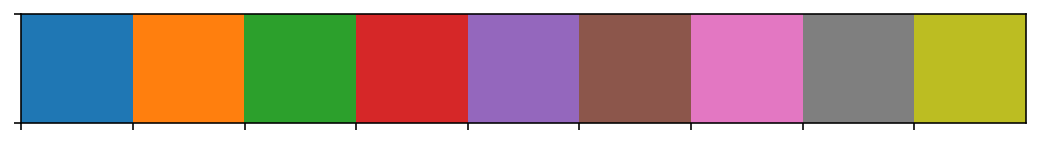

In [4]:
# 1. qualitative color palette - default for nominal data 
sb.palplot(sb.color_palette(n_colors=9))

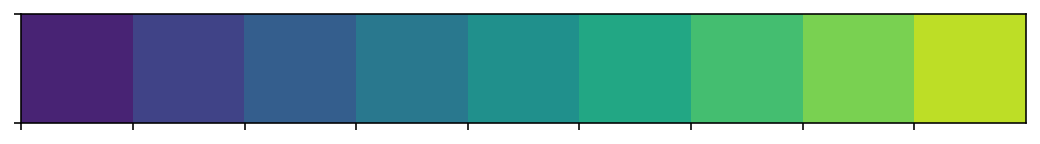

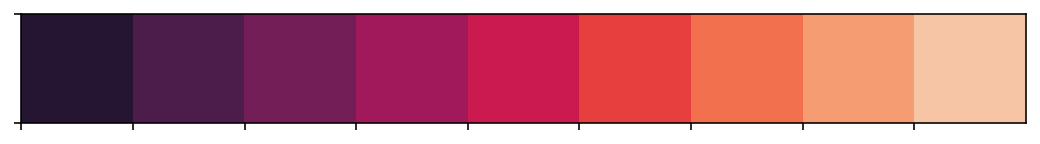

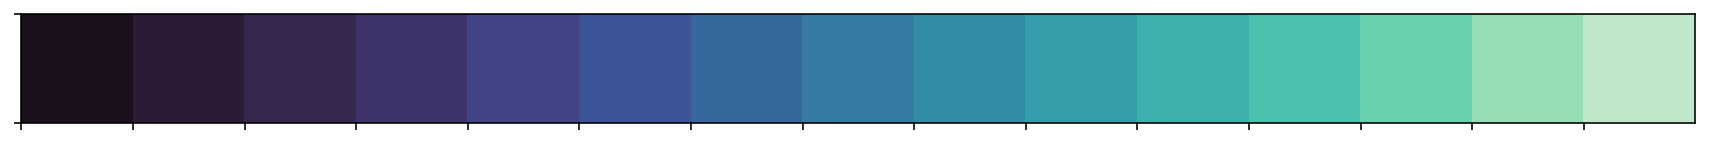

In [8]:
# 2. Sequential - light-to-dark trend across a single or small range of hues
# "viridis", takes the opposite approach, with dark colors indicating low values, 
# and light values indicating high
sb.palplot(sb.color_palette('viridis', 9))
sb.palplot(sb.color_palette('rocket', 9))
sb.palplot(sb.color_palette('mako', 15))

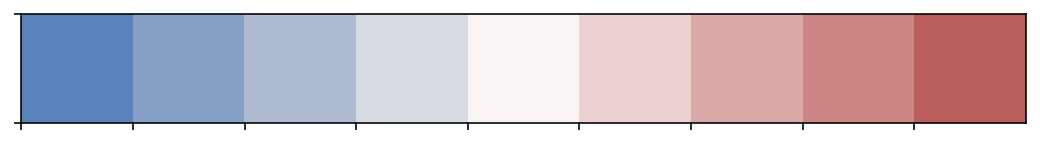

In [10]:
# 3. Diverging - if there is a meaningful zero or center value for the variable
# When using a diverging color palette, you will likely need to specify the "vmin" and "vmax" parameters in order to have the neutral point 
# in the palette meet the center point in the scale. 
sb.palplot(sb.color_palette('vlag', 9))

### Using color as third variable

The `violinplot`, `boxplot`, and `barplot` functions can all be made with third-variable clusters by adding a **"hue"** parameter. Code for heat maps can be adapted to depict third variables rather than counts, just by changing the "weights" parameter for hist2d, or the aggregation functions for your data to be fed into heatmap.

For `scatterplots`, there are two different ways of setting color, depending on the type of variable. For numeric variables, you can set the **"color" or "c"** parameter directly in the scatter function call. If you have a qualitative variable, you can set different colors for different levels of a categorical variable through the **"hue"** parameter on seaborn's **FacetGrid** class.

In [2]:
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0]) 

Text(0, 0.5, 'Combined fuel efficiency')

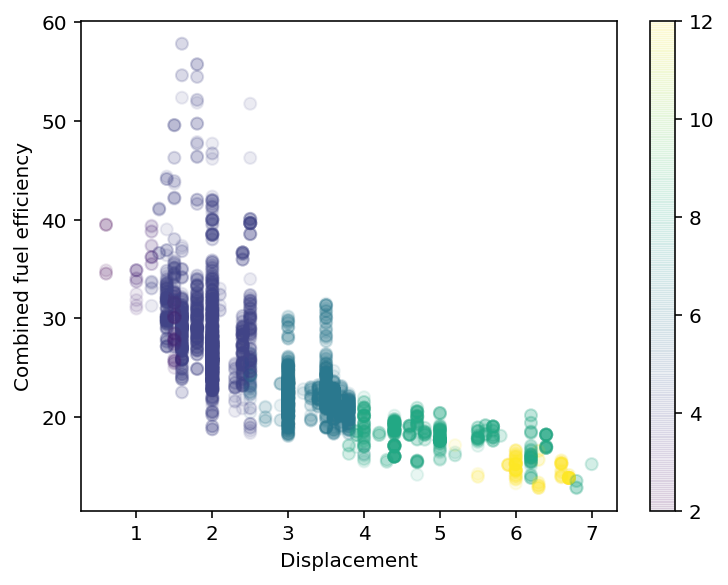

In [13]:
# Scatter plot - numeric variables
plt.scatter(data = fuel_econ, x = 'displ', y = 'comb', c = 'cylinders', alpha=0.1)
plt.colorbar()
plt.xlabel('Displacement')
plt.ylabel('Combined fuel efficiency')

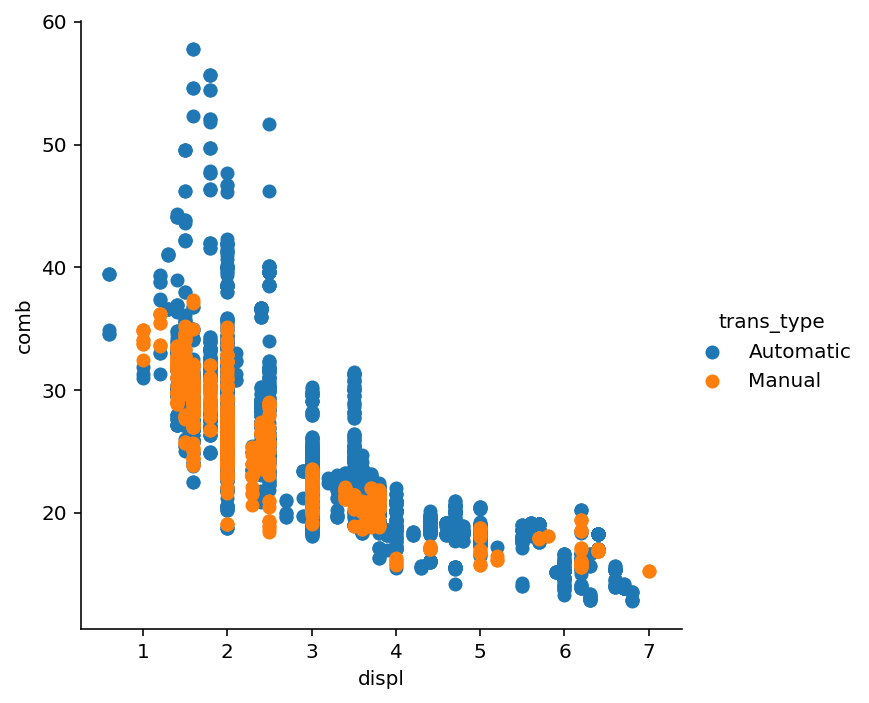

In [14]:
# Scatter plot - categorical variables
g = sb.FacetGrid(data = fuel_econ, hue = 'trans_type', size = 5)
g.map(plt.scatter, 'displ', 'comb')
g.add_legend()

# Exploring More than 2 dimensions

We can see that this scatter plot has given us the ability to simultaneously explore **four** different dimensions of the data: 

* the (x, y) location of each point corresponds to the sepal length and width
* the `size` of the point is related to the petal width
* the `color` is related to the particular species of flower. 

Multicolor and multifeature scatter plots like this can be useful for both exploration and presentation of data.

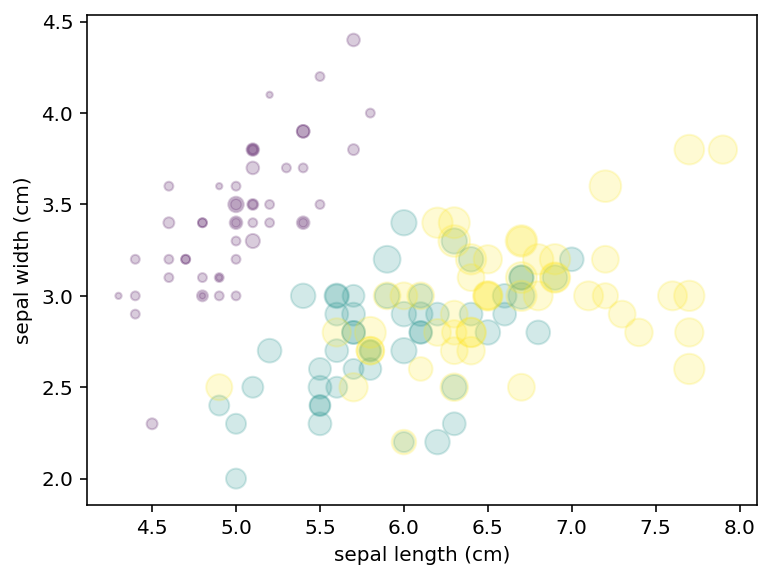

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

### Efficiency:

 While it doesn't matter as much for small amounts of data, as datasets get larger than a few thousand points, `plt.plot` can be noticeably **more efficient** than `plt.scatter`. The reason is that plt.scatter has the capability to render a different size and/or color for each point, so the renderer must do the extra work of constructing each point individually. 